In [4]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\Gauri\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd


In [7]:
df=pd.read_csv('StudentsPerformance.csv')

In [8]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [10]:
df['gpa'] = df[['math score', 'reading score', 'writing score']].mean(axis=1) / 10

In [11]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gpa
0,female,group B,bachelor's degree,standard,none,72,72,74,7.266667
1,female,group C,some college,standard,completed,69,90,88,8.233333
2,female,group B,master's degree,standard,none,90,95,93,9.266667
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.933333
4,male,group C,some college,standard,none,76,78,75,7.633333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.400000
996,male,group C,high school,free/reduced,none,62,55,55,5.733333
997,female,group C,high school,free/reduced,completed,59,71,65,6.500000
998,female,group D,some college,standard,completed,68,78,77,7.433333


In [12]:
import numpy as np
np.random.seed(42)
# Random attendance: 75–100%
df['attendance'] = np.random.randint(75, 101, size=len(df))
# Random activity level: 1–5 (clubs, sports, etc.)
df['activity_level'] = np.random.randint(1, 6, size=len(df))


In [13]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gpa,attendance,activity_level
0,female,group B,bachelor's degree,standard,none,72,72,74,7.266667,81,3
1,female,group C,some college,standard,completed,69,90,88,8.233333,94,4
2,female,group B,master's degree,standard,none,90,95,93,9.266667,89,5
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.933333,85,2
4,male,group C,some college,standard,none,76,78,75,7.633333,82,2
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,9.400000,98,3
996,male,group C,high school,free/reduced,none,62,55,55,5.733333,93,5
997,female,group C,high school,free/reduced,completed,59,71,65,6.500000,81,1
998,female,group D,some college,standard,completed,68,78,77,7.433333,77,1


In [14]:
df.to_csv('cleaned_student_data.csv', index=False)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('cleaned_student_data.csv')

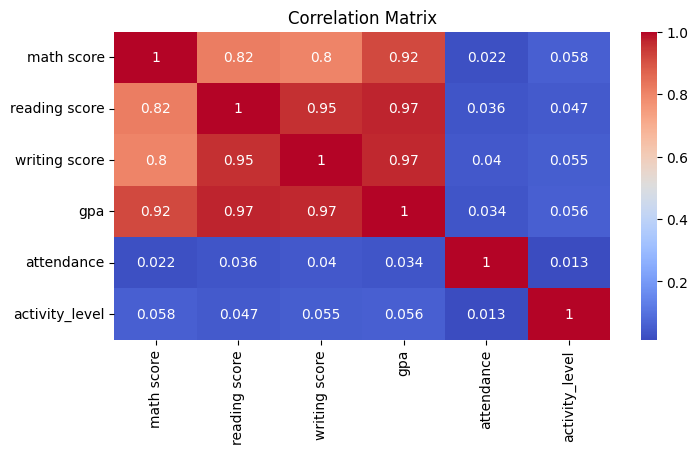

In [17]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

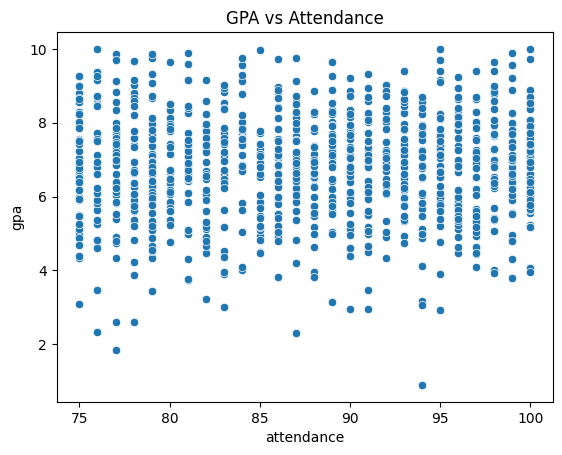

In [19]:
sns.scatterplot(x='attendance', y='gpa', data=df)
plt.title('GPA vs Attendance')
plt.show()

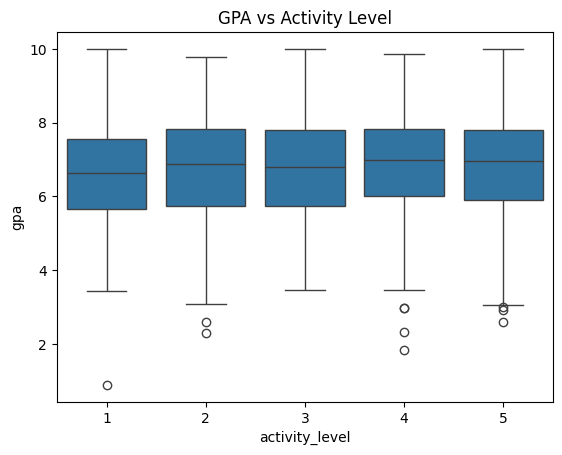

In [20]:
sns.boxplot(x='activity_level', y='gpa', data=df)
plt.title('GPA vs Activity Level')
plt.show()

<p>there are many outliers</p>

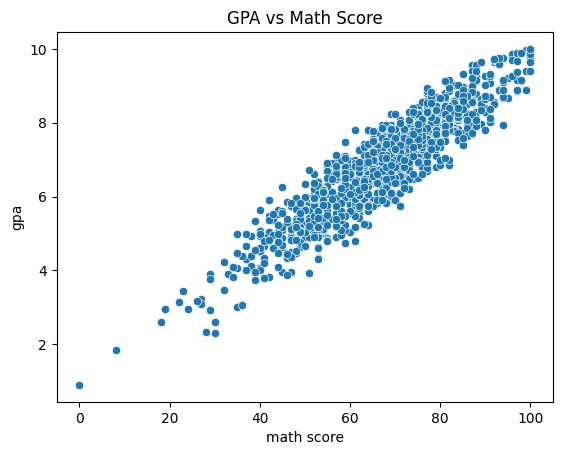

In [22]:
sns.scatterplot(x='math score', y='gpa', data=df)
plt.title('GPA vs Math Score')
plt.show()

<p>higher the math score , higher the gpa</p>

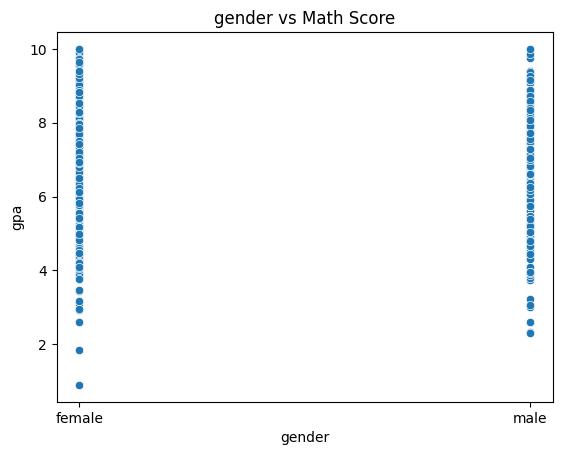

In [24]:
sns.scatterplot(x='gender', y='gpa', data=df)
plt.title('gender vs Math Score')
plt.show()

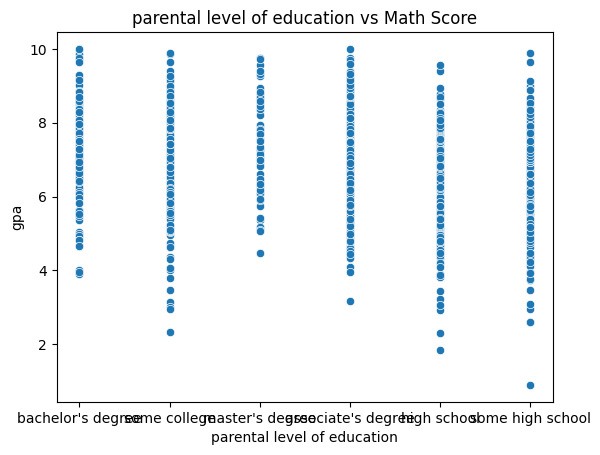

In [26]:
sns.scatterplot(x='parental level of education', y='gpa', data=df)
plt.title('parental level of education vs Math Score')
plt.show()

In [31]:
features = ['math score', 'reading score', 'writing score', 'attendance', 'activity_level']
target = 'gpa'


In [32]:
selected = df[features + [target]]
selected.to_csv('final_model_data.csv', index=False)

In [33]:
df = pd.read_csv('final_model_data.csv')

In [34]:
df

,math score,reading score,writing score,attendance,activity_level,gpa
0,72,72,74,81,3,7.266667
1,69,90,88,94,4,8.233333
2,90,95,93,89,5,9.266667
3,47,57,44,85,2,4.933333
4,76,78,75,82,2,7.633333
...,...,...,...,...,...,...
995,88,99,95,98,3,9.400000
996,62,55,55,93,5,5.733333
997,59,71,65,81,1,6.500000
998,68,78,77,77,1,7.433333


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['gpa'])  # features
y = df['gpa']                 # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train

,math score,reading score,writing score,attendance,activity_level
29,62,70,75,96,4
535,66,83,83,84,2
695,79,89,86,93,5
557,61,67,66,98,5
836,73,64,57,80,4
...,...,...,...,...,...
106,87,100,100,99,3
270,69,63,61,83,3
860,53,62,53,82,3
435,50,48,53,97,1


In [37]:
X_test

,math score,reading score,writing score,attendance,activity_level
521,91,86,84,94,5
737,53,66,73,100,3
740,80,73,72,87,4
660,74,77,73,99,4
411,84,83,78,96,3
...,...,...,...,...,...
408,52,57,56,75,5
332,62,56,53,78,4
208,74,81,76,89,2
613,65,77,74,92,1


In [38]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"{name} Evaluation:")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()

evaluate_model("Linear Regression", lr_model)
evaluate_model("Random Forest", rf_model)


Linear Regression Evaluation:
R² Score: 1.0
MAE: 1.6869838859179254e-15
RMSE: 2.15842032819237e-15

Random Forest Evaluation:
R² Score: 0.9932697104870882
MAE: 0.05270500000000012
RMSE: 0.12011448936558655



In [41]:
import joblib

joblib.dump(rf_model, 'college_gpa_model.pkl')
joblib.dump(X.columns.tolist(), 'model_features.pkl')  # Save feature names too


['model_features.pkl']

In [42]:
model = joblib.load('college_gpa_model.pkl')
features = joblib.load('model_features.pkl')

df = pd.read_csv('final_model_data.csv')
X = df[features]
y = df['gpa']

In [43]:
df

,math score,reading score,writing score,attendance,activity_level,gpa
0,72,72,74,81,3,7.266667
1,69,90,88,94,4,8.233333
2,90,95,93,89,5,9.266667
3,47,57,44,85,2,4.933333
4,76,78,75,82,2,7.633333
...,...,...,...,...,...,...
995,88,99,95,98,3,9.400000
996,62,55,55,93,5,5.733333
997,59,71,65,81,1,6.500000
998,68,78,77,77,1,7.433333


In [44]:
X

,math score,reading score,writing score,attendance,activity_level
0,72,72,74,81,3
1,69,90,88,94,4
2,90,95,93,89,5
3,47,57,44,85,2
4,76,78,75,82,2
...,...,...,...,...,...
995,88,99,95,98,3
996,62,55,55,93,5
997,59,71,65,81,1
998,68,78,77,77,1


In [45]:
y

0      7.266667
1      8.233333
2      9.266667
3      4.933333
4      7.633333
         ...   
995    9.400000
996    5.733333
997    6.500000
998    7.433333
999    8.300000
Name: gpa, Length: 1000, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_pred = model.predict(X_test)
y_pred

array([8.66066667, 6.337     , 7.45266667, 7.49066667, 8.121     ,
       7.788     , 6.72833333, 5.903     , 7.70766667, 4.936     ,
       4.73366667, 2.43266667, 7.56833333, 5.85566667, 8.33666667,
       7.46633333, 4.93233333, 4.78366667, 5.27933333, 6.11333333,
       7.29833333, 4.98      , 6.57166667, 4.46933333, 7.89433333,
       7.72466667, 7.16433333, 4.97033333, 4.31666667, 5.55266667,
       5.95933333, 6.65633333, 6.04966667, 7.315     , 7.71833333,
       5.151     , 7.57066667, 7.421     , 7.52233333, 2.315     ,
       7.80366667, 6.42133333, 6.50833333, 6.091     , 8.53533333,
       6.469     , 7.07533333, 3.00733333, 8.59133333, 7.92      ,
       7.18033333, 7.16433333, 7.831     , 5.34066667, 7.124     ,
       7.22433333, 8.173     , 5.44933333, 8.27633333, 8.89233333,
       4.30166667, 8.06733333, 7.86266667, 6.107     , 8.76666667,
       7.325     , 6.55433333, 5.48666667, 6.404     , 8.81833333,
       6.40166667, 8.60666667, 5.62066667, 5.209     , 5.96166

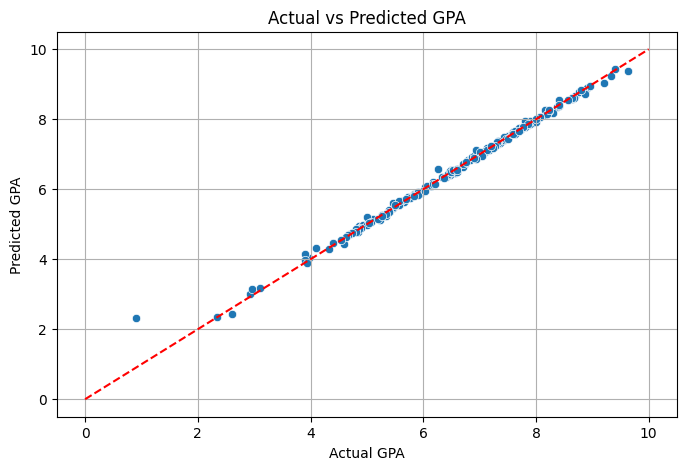

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([0, 10], [0, 10], 'r--')  # reference line
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA")
plt.grid()
plt.show()

In [49]:
def give_recommendation(attendance, activity_level, math, reading, writing):
    recs = []

    avg_score = (math + reading + writing) / 3

    if attendance < 85:
        recs.append("Try to maintain attendance above 85% for better consistency.")
    if activity_level < 3:
        recs.append("Engaging in more academic or co-curricular activities can help.")
    if avg_score < 70:
        recs.append("Focus on improving exam preparation — average scores seem low.")
    if attendance >= 90 and avg_score >= 80:
        recs.append("You’re doing great! Keep up the consistency.")

    return recs


In [50]:
sample_input = {
    'attendance': 78,
    'activity_level': 2,
    'math_score': 65,
    'reading_score': 72,
    'writing_score': 68
}

recs = give_recommendation(
    attendance=sample_input['attendance'],
    activity_level=sample_input['activity_level'],
    math=sample_input['math_score'],
    reading=sample_input['reading_score'],
    writing=sample_input['writing_score']
)

print("\n".join(recs))


Try to maintain attendance above 85% for better consistency.
Engaging in more academic or co-curricular activities can help.
Focus on improving exam preparation — average scores seem low.
